### Energy Information Administration API Example

Brian Dew

December 28, 2019

In [1]:
%matplotlib inline
import requests
import pandas as pd
from config import eia_key as key

In [2]:
s_ids = ['MCRFPCO2', 'MCRFPTX2', 'MCRFPND2', 'MCRFPNM2', 
         'MCRFPUS2', 'MCRFP3FM2']

d = {}

for series in s_ids:
    s = f'PET.{series}.M'
    url = f'http://api.eia.gov/series/?api_key={key}&series_id={s}&start=198801'    
    r = requests.get(url).json()
    data = {pd.to_datetime(f'{i[0]}01'): i[1] for i in r['series'][0]['data']}
    d[r['series'][0]['series_id']] = data
    
    
df = pd.DataFrame(d).sort_index()

df['ND_NM_CO'] = df[['PET.MCRFPND2.M', 'PET.MCRFPNM2.M', 'PET.MCRFPCO2.M']].sum(axis=1)

df['USA'] = df['PET.MCRFPUS2.M']

df['TX'] = df['PET.MCRFPTX2.M']

df['GM'] = df['PET.MCRFP3FM2.M']

df['OTH'] = df['USA'] - df['TX'] - df['ND_NM_CO'] - df['GM']

data = df.loc['1989':,['ND_NM_CO', 'TX', 'OTH', 'GM', 'USA']].divide(1000, axis=1)
data.to_csv('/home/brian/Documents/uschartbook/chartbook/data/oil_prod.csv', index_label='date')

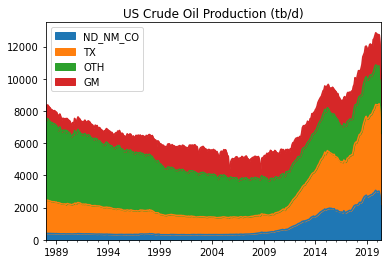

In [3]:
df[['ND_NM_CO', 'TX', 'OTH', 'GM']].plot(kind='area', title='US Crude Oil Production (tb/d)');

In [4]:
df.index[-1]

Timestamp('2020-05-01 00:00:00')